### Import Libraries

In [ ]:
!python --version

In [1]:
import numpy as np
from charRNN_utils import parseFile,buildModel, generateSequence,plotGraph
import random

Using TensorFlow backend.


### Basic Setting - Configuration

In [2]:
num_prevChar = 5
datapath = '/home/adityav/UCSD/Spring17/COGS260_ImageRecognition/HW4/Data/tinyshakespeare.txt'

### Parse data

In [3]:
[trainData,testData, vocab, vocabLength, seedList] = parseFile(datapath,num_prevChar, batchIndex = 1)

### Build network

In [4]:
nHiddenNeuron = 256
percentDropout = 0
optimizerList = ['RMSprop','Adagrad']
optimizerUsed = optimizerList[1]
rnn_lstm = 'lstm'           # 'rnn' or 'lstm' -> depends on the type of cell we want to use in network.

model = buildModel(num_prevChar ,vocabLength,
                   nHiddenNeuron, rnn_lstm,
                   percentDropout,optimizerUsed)


Building model.......................................
Model Build.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               329728    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 65)                16705     
Total params: 346,433
Trainable params: 346,433
Non-trainable params: 0
_________________________________________________________________


### Train network 

/home/adityav/.virtualenvs/cv/local/lib/python2.7/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 111538 samples, validate on 27885 samples
Epoch 1/1
111538/111538 [==============================] - 58s - loss: 5.5005 - acc: 0.1419 - val_loss: 5.3325 - val_acc: 0.1474
Train on 111538 samples, validate on 27885 samples
Epoch 1/1
111538/111538 [==============================] - 19275s - loss: 5.4437 - acc: 0.1515 - val_loss: 5.4289 - val_acc: 0.1527
Train on 111538 samples, validate on 27885 samples
Epoch 1/1
111538/111538 [==============================] - 57s - loss: 5.4256 - acc: 0.1537 - val_loss: 5.4437 - val_acc: 0.1543
Train on 111538 samples, validate on 27885 samples
Epoch 1/1
111538/111538 [==============================] - 55s - loss: 5.3616 - acc: 0.1555 - val_loss: 5.3883 - val_acc: 0.1552
Train on 111538 samples, validate on 27885 samples
Epoch 1/1
111538/111538 [==============================] - 55s - loss: 5.4478 - acc: 0.1537 - val_loss: 5.4426 - val_acc: 0.1539
Train on 111538 samples, validate on 27885 samples
Epoch 1/1
111538/111538 [=====================

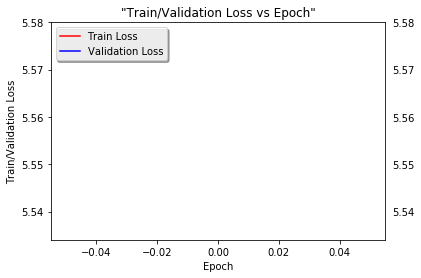

In [5]:
for batchIndex in range(8):
    [trainData,testData, vocab, vocabLength, seedList] = parseFile(datapath,num_prevChar, batchIndex )
    history = model.fit(trainData['x'],trainData['y_true'],
                        batch_size=1024, nb_epoch=1,verbose=1,
                        validation_data=( testData['x'], testData['y_true']))
model.save_weights('charRNN_model_weights.hdf5')
plotGraph(history, percentDropout, nHiddenNeuron, optimizerUsed)

In [ ]:
maxLength = 1000; 
#seedIndex = [83,19,51,27,17,19]
count = 1

fHandle = open('GeneratedShakespeare.txt','w')

for i in range(1):
    seedIndex = random.randint(0,len(seedList)-1)
    seedSentence = seedList[seedIndex]
    generateSequence(fHandle, model, num_prevChar, vocabLength, vocab,
                     maxLength,seedSentence, count)
    count = count+1

fHandle.close()

print('Generated  shakespeare File: GeneratedShakespeare.txt')